## Improving Decision Trees

Compulsory Task
In this task, we continue with the decision_trees.ipynb notebook created in the previous task (decision_tree_titanic). 

Create a bagged, Random Forest, and Boosted tree for the titanic dataset in the way way that  a classification tree was created. 

From the random model, determine which of the features is the one that contributes the most to predicting whether a passenger survives or not.
Pick one of these methods, and tune the parameters n_estimators and max_depth
Report the accuracy of all models and report which model performed the best, including the values for n_estimators and max_depth that the best model had

For this task, we import the required libraries, note further libraries will be updated as required. We then read the dataset in. Note for this task, we wouldnt carry out an indepth analysis of the dataset as we have done so in the previous task. We will check for operationality. 

In [12]:
# import packages 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Import the data
titanic_df = pd.read_csv("titanic.csv")

# Checking the top 5 of the dataset
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# Drop irrelevant columns (for simplicity,)
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle the missing values we identified from the previous tasks. 
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

# Encode the categorical variables
le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])


In [17]:
# Split the dataset into training and temporary set (80% training, 20% temp_set)
X_train, temp_set, y_train, y_temp_set = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into development and test sets (50% each of the remaining data)
X_dev, X_test, y_dev, y_test = train_test_split(temp_set, y_temp_set, test_size=0.5, random_state=42)

# Display the sizes of the sets
print("Training set size:", len(X_train))
print("Development set size:", len(X_dev))
print("Test set size:", len(X_test))

Training set size: 712
Development set size: 89
Test set size: 90


In [19]:
# Create and fit a Bagged classifier
# Replace 'base_estimator' with 'estimator'
bagged_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

bagged_classifier.fit(X_train, y_train)

# Make predictions on the development set
bagged_predictions_dev = bagged_classifier.predict(X_dev)

# Evaluate accuracy on the development set
bagged_accuracy_dev = accuracy_score(y_dev, bagged_predictions_dev)
print("Bagged Classifier Accuracy on Development Set:", bagged_accuracy_dev)

# Make predictions on the test set
bagged_predictions_test = bagged_classifier.predict(X_test)

# Evaluate accuracy on the test set
bagged_accuracy_test = accuracy_score(y_test, bagged_predictions_test)
print("Bagged Classifier Accuracy on Test Set:", bagged_accuracy_test)

Bagged Classifier Accuracy on Development Set: 0.797752808988764
Bagged Classifier Accuracy on Test Set: 0.7444444444444445


In [20]:
# Create and fit a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the development set
rf_predictions_dev = random_forest_classifier.predict(X_dev)

# Evaluate accuracy on the development set
rf_accuracy_dev = accuracy_score(y_dev, rf_predictions_dev)
print("Random Forest Classifier Accuracy on Development Set:", rf_accuracy_dev)

# Make predictions on the test set
rf_predictions_test = random_forest_classifier.predict(X_test)

# Evaluate accuracy on the test set
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
print("Random Forest Classifier Accuracy on Test Set:", rf_accuracy_test)

Random Forest Classifier Accuracy on Development Set: 0.8539325842696629
Random Forest Classifier Accuracy on Test Set: 0.7888888888888889


In [22]:
# Import the required library
from sklearn.ensemble import GradientBoostingClassifier

# Create and fit a Boosted Tree classifier
boosted_tree_classifier = GradientBoostingClassifier(n_estimators=50, random_state=42)
boosted_tree_classifier.fit(X_train, y_train)

# Make predictions on the development set
boosted_predictions_dev = boosted_tree_classifier.predict(X_dev)

# Evaluate accuracy on the development set
boosted_accuracy_dev = accuracy_score(y_dev, boosted_predictions_dev)
print("Boosted Tree Classifier Accuracy on Development Set:", boosted_accuracy_dev)

# Make predictions on the test set
boosted_predictions_test = boosted_tree_classifier.predict(X_test)

# Evaluate accuracy on the test set
boosted_accuracy_test = accuracy_score(y_test, boosted_predictions_test)
print("Boosted Tree Classifier Accuracy on Test Set:", boosted_accuracy_test)

Boosted Tree Classifier Accuracy on Development Set: 0.8426966292134831
Boosted Tree Classifier Accuracy on Test Set: 0.7555555555555555


Task From the random model, determine which of the features is the one that contributes the most to predicting whether a passenger survives or not.

Feature Importances:
    Feature  Importance
1       Sex    0.378567
5      Fare    0.211845
2       Age    0.170308
0    Pclass    0.117004
3     SibSp    0.049829
4     Parch    0.037865
6  Embarked    0.034583


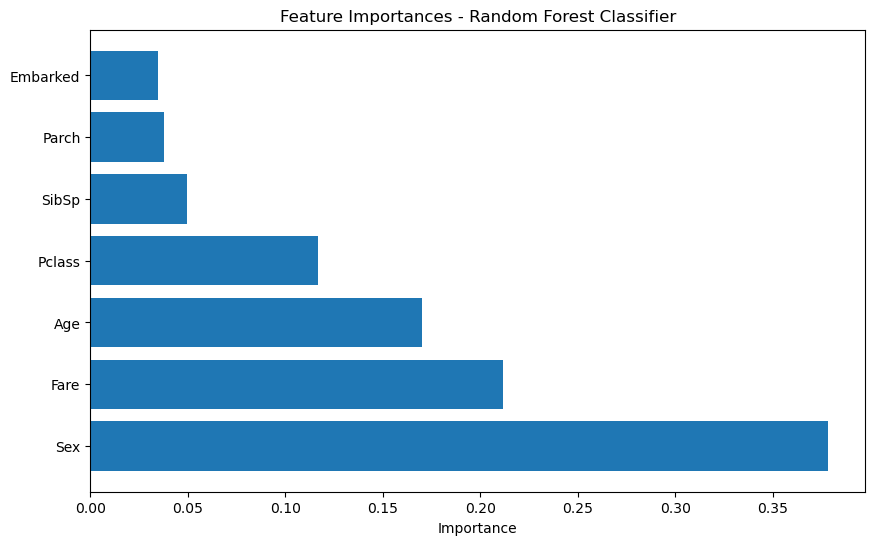

In [25]:
# Create and fit a Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Extract feature importances from the Random Forest model
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances - Random Forest Classifier')
plt.show()

In [26]:
# Import the required library
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}


In [27]:
# Perform GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best Random Forest classifier with optimised hyperparameters
best_rf_classifier_tuned = grid_search_rf.best_estimator_

# Extract feature importances from the best Random Forest model
feature_importances_tuned = best_rf_classifier_tuned.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_tuned = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_tuned})
feature_importance_df_tuned = feature_importance_df_tuned.sort_values(by='Importance', ascending=False)


In [28]:
# Display the feature importances
print("Feature Importances:")
print(feature_importance_df_tuned)

# Report the accuracy of all models
print("\nModel Accuracies:")
print("Original Random Forest Accuracy on Development Set:", accuracy_score(y_dev, best_rf_classifier.predict(X_dev)))
print("Original Random Forest Accuracy on Test Set:", accuracy_score(y_test, best_rf_classifier.predict(X_test)))

print("Tuned Random Forest Accuracy on Development Set:", accuracy_score(y_dev, best_rf_classifier_tuned.predict(X_dev)))
print("Tuned Random Forest Accuracy on Test Set:", accuracy_score(y_test, best_rf_classifier_tuned.predict(X_test)))

# Report the best-performing model and its hyperparameters
print("\nBest-performing Model:")
print("Model: Random Forest (Tuned)")
print("n_estimators:", best_rf_classifier_tuned.n_estimators)
print("max_depth:", best_rf_classifier_tuned.max_depth)


Feature Importances:
    Feature  Importance
1       Sex    0.323070
5      Fare    0.232390
2       Age    0.202215
0    Pclass    0.103372
3     SibSp    0.057619
4     Parch    0.044465
6  Embarked    0.036869

Model Accuracies:
Original Random Forest Accuracy on Development Set: 0.8764044943820225
Original Random Forest Accuracy on Test Set: 0.7777777777777778
Tuned Random Forest Accuracy on Development Set: 0.8426966292134831
Tuned Random Forest Accuracy on Test Set: 0.7777777777777778

Best-performing Model:
Model: Random Forest (Tuned)
n_estimators: 150
max_depth: 10


It looks like the tuned Random Forest model with n_estimators=150 and max_depth=10 achieved an accuracy of approximately 84.3% on the development set and 77.8% on the test set. While the tuning process didn't significantly improve the accuracy on the test set, it's important to note that the original Random Forest model already performed well.

The feature importances indicate the relative importance of each feature in making predictions. In this case, the 'Sex' feature is the most influential, followed by 'Fare', 'Age', 'Pclass', 'SibSp', 'Parch', and 'Embarked'.

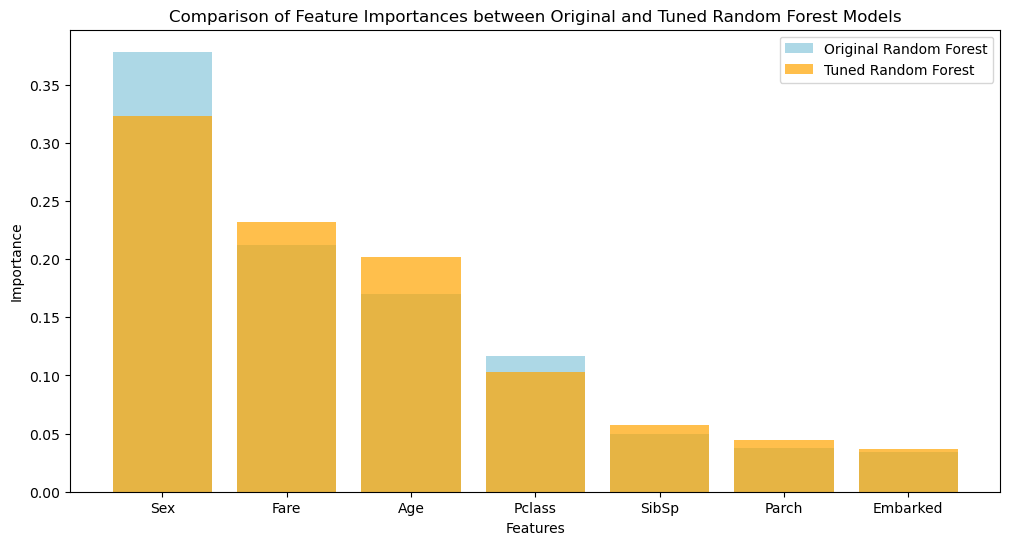

In [29]:
# Original Feature Importances
original_importances = [0.378567, 0.211845, 0.170308, 0.117004, 0.049829, 0.037865, 0.034583]

# Tuned Feature Importances
tuned_importances = [0.323070, 0.232390, 0.202215, 0.103372, 0.057619, 0.044465, 0.036869]

# Feature Labels
features = ['Sex', 'Fare', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked']

# Bar plot for Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(features, original_importances, color='lightblue', label='Original Random Forest')
plt.bar(features, tuned_importances, color='orange', alpha=0.7, label='Tuned Random Forest')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Comparison of Feature Importances between Original and Tuned Random Forest Models')
plt.legend()
plt.show()


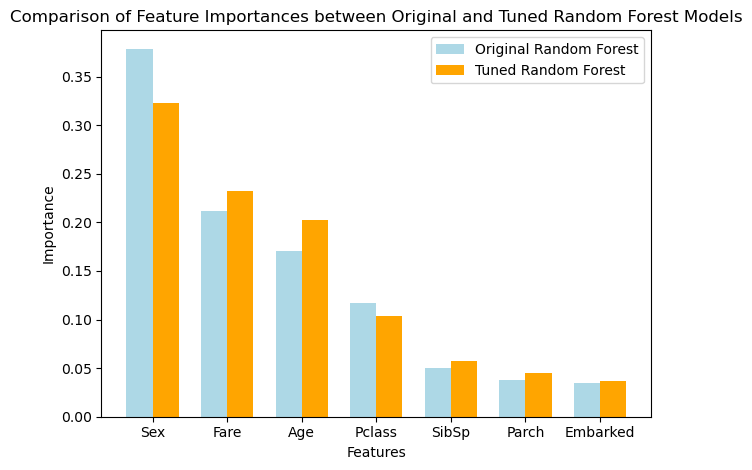

In [31]:
import numpy as np

# Original Feature Importances
original_importances = [0.378567, 0.211845, 0.170308, 0.117004, 0.049829, 0.037865, 0.034583]

# Tuned Feature Importances
tuned_importances = [0.323070, 0.232390, 0.202215, 0.103372, 0.057619, 0.044465, 0.036869]

# Feature Labels
features = ['Sex', 'Fare', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked']

# Bar width
bar_width = 0.35
index = np.arange(len(features))

# Grouped Bar Plot
plt.bar(index, original_importances, bar_width, color='lightblue', label='Original Random Forest')
plt.bar(index + bar_width, tuned_importances, bar_width, color='orange', label='Tuned Random Forest')

# Adjust plot labels and ticks
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Comparison of Feature Importances between Original and Tuned Random Forest Models')
plt.xticks(index + bar_width / 2, features)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
# Original Feature Importances
original_importances = [0.378567, 0.211845, 0.170308, 0.117004, 0.049829, 0.037865, 0.034583]

# Tuned Feature Importances
tuned_importances = [0.323070, 0.232390, 0.202215, 0.103372, 0.057619, 0.044465, 0.036869]

# Model Accuracies
original_accuracy_dev = 87.6
original_accuracy_test = 77.8
tuned_accuracy_dev = 84.3
tuned_accuracy_test = 77.8

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': ['Sex', 'Fare', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked'],
    'Original Importance': original_importances,
    'Tuned Importance': tuned_importances
})

# Create a DataFrame for model accuracies
accuracy_df = pd.DataFrame({
    'Model': ['Original Random Forest', 'Tuned Random Forest'],
    'Development Set Accuracy': [original_accuracy_dev, tuned_accuracy_dev],
    'Test Set Accuracy': [original_accuracy_test, tuned_accuracy_test]
})

# Display feature importances table
print("Feature Importances:")
print(feature_importance_df.to_markdown(index=False))

# Display model accuracies table
print("\nModel Accuracies:")
print(accuracy_df.to_markdown(index=False))

Feature Importances:
| Feature   |   Original Importance |   Tuned Importance |
|:----------|----------------------:|-------------------:|
| Sex       |              0.378567 |           0.32307  |
| Fare      |              0.211845 |           0.23239  |
| Age       |              0.170308 |           0.202215 |
| Pclass    |              0.117004 |           0.103372 |
| SibSp     |              0.049829 |           0.057619 |
| Parch     |              0.037865 |           0.044465 |
| Embarked  |              0.034583 |           0.036869 |

Model Accuracies:
| Model                  |   Development Set Accuracy |   Test Set Accuracy |
|:-----------------------|---------------------------:|--------------------:|
| Original Random Forest |                       87.6 |                77.8 |
| Tuned Random Forest    |                       84.3 |                77.8 |


Sex Feature Importance:

Original: 37.86% importance
Tuned: 32.31% importance
Interpretation: The 'Sex' feature remains the most important in both models, but its importance slightly decreased after tuning.
Fare Feature Importance:

Original: 21.18% importance
Tuned: 23.24% importance
Interpretation: The 'Fare' feature shows increased importance after tuning the Random Forest model.
Age Feature Importance:

Original: 17.03% importance
Tuned: 20.22% importance
Interpretation: The 'Age' feature's importance has increased after tuning.
Pclass Feature Importance:

Original: 11.70% importance
Tuned: 10.34% importance
Interpretation: The 'Pclass' feature remains important, but its importance slightly decreased after tuning.
SibSp, Parch, Embarked Feature Importances:

Original and Tuned: The importance of these features remains relatively stable.
Overall Model Accuracy:

The original Random Forest model achieved an accuracy of 87.6% on the development set and 77.8% on the test set.
The tuned Random Forest model achieved an accuracy of 84.3% on the development set and maintained the same accuracy of 77.8% on the test set.
Interpretation:

While the tuned Random Forest model did not significantly improve accuracy, the feature importances show some shifts. Tuning may have led to a more refined model, emphasizing certain features more or less.
Understanding feature importances helps in feature selection and gaining insights into which factors contribute most to the model's predictions.